In [ ]:
!unzip archive_1.zip


Archive:  archive_1.zip
replace README? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
from PIL import Image
import os.path
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from keras.preprocessing.image import img_to_array

data_set = []
Y =[]

for id in range(1,41):
    for count in range(1,11) :
      image = Image.open('s'+str(id)+'/'+str(count)+'.pgm')         #read image from file
      image_arr = img_to_array(image)                               #convert image to array
      image_arr = np.resize(image_arr,(10304))                      #resize images to 92x112
      data_set.append(image_arr)                                    #add image array to data list
      Y.append(id)                                                  #add id from 1 to 10 for each person's images in label list Y

D = np.arange(400*10304).reshape(400,10304)                         #stack the 400 vector in single matrix D

for i in range(0,400):
    D[i] = np.array(data_set[i])  

In [ ]:
trainSet_split=np.arange(2885120).reshape(280,10304)
testSet_split=np.arange(1236480).reshape(120,10304)
trainLabel_split= np.arange(280).reshape(280,1)
testLabel_split= np.arange(120).reshape(120,1)

j,k=7,3
classLabel=1
for i in range(0,401,10):
    if( i != 0 ):
        trainSet_split[j-7:j,:]=D[i-10:i-3,:]
        testSet_split[k-3:k,:]=D[i-3:i,:]
        trainLabel_split[j-7:j]= np.full((7,1), classLabel, dtype=int)
        testLabel_split[k-3:k]= np.full((3,1), classLabel, dtype=int)
        classLabel+=1
        j+=7
        k+=3

In [ ]:
import numpy as np
import scipy.linalg as la

#mean
data_M = np.mean(data_set,axis=0)                                     #compute mean of the data set
trainSet_split_M = np.mean(trainSet_split,axis=0)                     #compute mean of the trainig set with splitting

#centered
data_Z = data_set-data_M                                              #center the data set
trainSet_split_Z = trainSet_split-trainSet_split_M                    #center the training set with splitting     

cov = 1/400*np.dot(data_Z.T,data_Z)                                   #compute covariance matrix

eigenvalue,eigenvector = la.eig(cov)                                  #compute eigenvalues and eigenvectors

index = eigenvalue.argsort()[::-1]                                    #sort the indecies of the ascending eigenvalues
                                                                      # and get the index of the largest one

eigenvalue = eigenvalue[index]                                        #crop eigenvalues 
eigenvector = eigenvector[:,index]                                    #crop eigenvectors

def chooseDimensionality(eigenvalue,alpha):                           #function to choose the dimensionality
    data_variance = np.sum(eigenvalue.real)                           #compute data set variance
    variance_ratio, num_dimensions, eigValSum = 0,0,0     
    while(variance_ratio < alpha):
        eigValSum += eigenvalue[num_dimensions]
        variance_ratio = eigValSum/data_variance
        num_dimensions += 1
    return num_dimensions


alpha = 0.8
44
alpha = 0.85
68
alpha = 0.9
111
alpha = 0.95
190


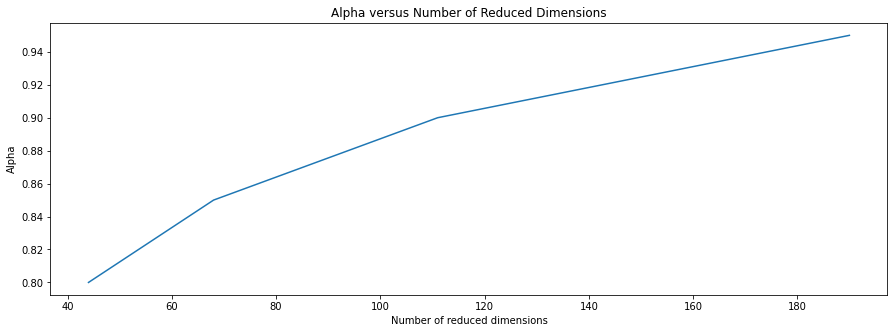

In [ ]:
alpha = np.array([0.8,0.85,0.9,0.95])                                 #define alpha
dim_alpha = np.empty(4,dtype=object)
projection_matrices = []                                              #create list for projection matrices 

for i in range(len(alpha)):
    dim_alpha[i] = chooseDimensionality(eigenvalue,alpha[i])
    print("alpha =",alpha[i])
    print(dim_alpha[i])
    
plt.plot(dim_alpha, alpha)                                            #plot the number of dimensions vs each alpha        
plt.title('Alpha versus Number of Reduced Dimensions')
plt.gcf().set_size_inches(15,5)
plt.xlabel('Number of reduced dimensions')
plt.ylabel('Alpha')
plt.show()

for i in range(0,4):
  projection_matrices.append(eigenvector[:,0:dim_alpha[i]])


In [ ]:
reduced_dim_train = []                                             #project training set  
for i in range(0,4): 
   reduced_dim_train.append((projection_matrices[i].T @ trainSet_split_Z.T))


In [ ]:
testSet_split_M = np.mean(testSet_split,axis=0)                                 #compute mean of the testing set with splitting

testSet_split_Z = testSet_split-testSet_split_M                                  #center the testing set with splitting

In [ ]:
reduced_dim_test = []                                             #project testing set 
for i in range(0,4):
   reduced_dim_test.append(projection_matrices[i].T @ testSet_split_Z.T)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was

accuracy at knn  1  =  0.9583333333333334
accuracy at knn  1  =  0.95
accuracy at knn  1  =  0.9583333333333334
accuracy at knn  1  =  0.9416666666666667
accuracy at knn  2  =  0.9416666666666667
accuracy at knn  2  =  0.9333333333333333
accuracy at knn  2  =  0.9333333333333333
accuracy at knn  2  =  0.925
accuracy at knn  3  =  0.9083333333333333
accuracy at knn  3  =  0.8833333333333333
accuracy at knn  3  =  0.875
accuracy at knn  3  =  0.8666666666666667
accuracy at knn  4  =  0.875
accuracy at knn  4  =  0.825
accuracy at knn  4  =  0.8083333333333333
accuracy at knn  4  =  0.7916666666666666


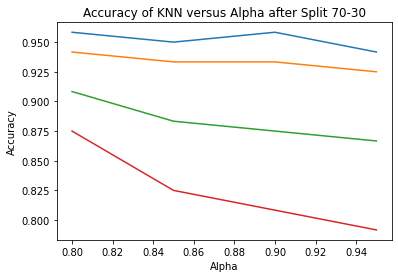

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

def knn(trainingSet,trainingLabel,testSet,testLabel,k):           #function to compute KNN
    knn = KNeighborsClassifier(k)
    knn.fit(trainingSet,trainingLabel)
    pred = knn.predict(testSet)
    accuracy = metrics.accuracy_score(testLabel, pred)
    return accuracy

knn_accuracy = [] 
num_neighbors = np.array([1,3,5,7])


for n in range (0,4):                                             #call function Knn for each number of neighbours four times for each alpha
   for i in range(0,4):
      knn_accuracy.append(knn(reduced_dim_train[i].real.T,trainLabel_split,reduced_dim_test[i].real.T,testLabel_split,num_neighbors[n]))
      print("accuracy at knn ",n+1," = ",knn_accuracy[i])
   plt.plot(alpha,knn_accuracy)
   knn_accuracy = []


plt.title('Accuracy of KNN versus Alpha after Split 70-30')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


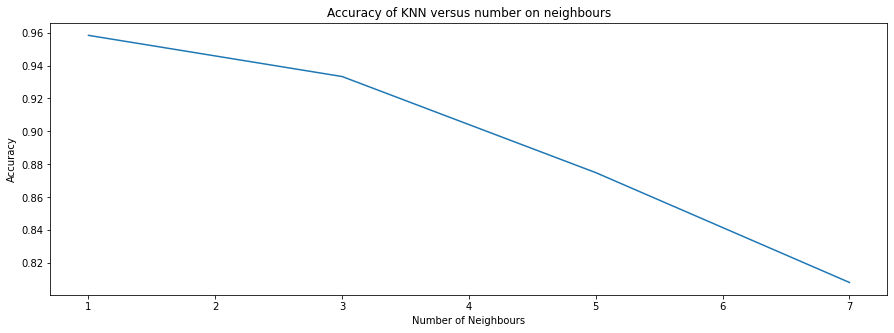

In [ ]:
alpha = 0.9
score = []
for i in range (0,4):
    score.append(knn(reduced_dim_train[2].real.T,trainLabel_split,reduced_dim_test[2].real.T,testLabel_split,num_neighbors[i]))
plt.plot (num_neighbors,score)    
plt.title('Accuracy of KNN versus number on neighbours')
plt.gcf().set_size_inches(15,5)
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.show()